#Video Game Sales Project

This Dataset provides up-to-date information on the sales performance and popularity of various video games worldwide. The data includes the name, platform, year of release, genre, publisher, and sales in North America, Europe, Japan, and other regions.

In [53]:
#Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('vgsales.csv')


# Step 1: Data Profiling

In [55]:
# check null value,dtpes and columns name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [56]:
df.head() #check 5 row

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [57]:
#to check how many rows and column present in dataset
df.shape

(16598, 11)

In [58]:
#datasetko statistics patta lagako
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [59]:
df['Genre'].value_counts() # kun type ko game haru kati patak count vayo

,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [60]:
df['Platform'].value_counts() # kun console or device (platform) ma kati patak game xa

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


#Data Quality Check

In [61]:
# to check missing value in dataset or not
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [62]:
df.isnull().sum().sum() #check totall missing value altogethere.

np.int64(329)

In [63]:
# Fill missing Year
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Fill missing Publisher
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)


<ipython-input-63-17b258449cc6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mode()[0], inplace=True)
<ipython-input-63-17b258449cc6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [64]:
df.isnull().sum().sum() # (o null value) all 329 null value clear

np.int64(0)

In [65]:
#convert 'year'(float to int)
df['Year']=df['Year'].astype(int) #year float ma vayeko lai int data type ma change gareko
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#Duplicate Check

In [66]:
df.duplicated().sum() #check duplicate value

np.int64(0)

#Visualization

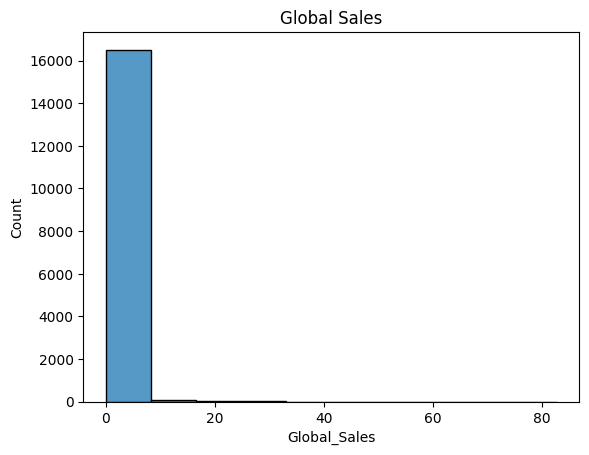

In [67]:
sns.histplot(df['Global_Sales'],bins=10)
plt.title('Global Sales')
plt.show()

#Description of this histogram plot

yo plot le Global Sales world wide distribution dekhauxa .yo plot le histogram plot show garxa ra kati ota video games le kati sales gareko xa.

bins=10 le data lai 10 bhagma (intervals) ma baadiyeko xa

X-axis ma Global Sales (sales bhayeko rakam),

Y-axis ma kati ota gameharu tyo salesbhayeko area bhitra parxa

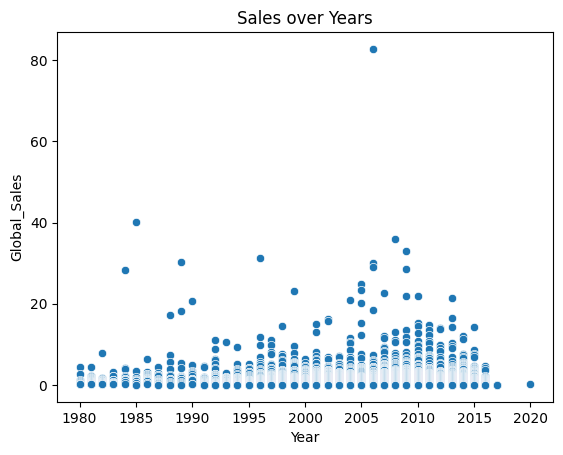

In [68]:
sns.scatterplot(x='Year',y='Global_Sales',data=df)
plt.title('Sales over Years')
plt.show()

#Description of this scatter plot

harek video game ko globally sales kun year ma kati sales vayo vanera dekhauxa.

harek point (dot) ek game ho

X-axis game launched vayeko year Y-axis ma tyo gameko global sales

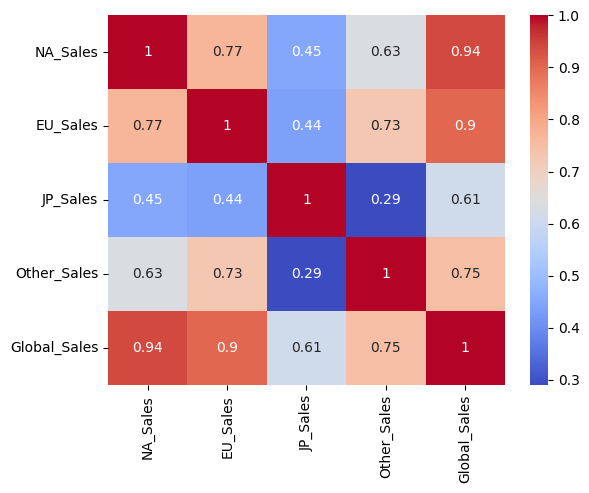

In [69]:
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.show()


#Description of this heatmap

yo heatmap plot le sales bhayeko video game different country haruko ko bichko correlation dekhauxa.

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']] yo column ko sales check garda

.corr() yesle yo sano-sano box ko bichko correlation matrix banauxa.

+1=strong positive -1=strong negative 0=no correlation

annot=True: harek box bhitra correlation number dekhauxa

cmap='coolwarm': nilo-rato colorko use hunxa (blue color ko vayo vane less coreelation hunxa .red color ko vayo vane high correlation hunxa

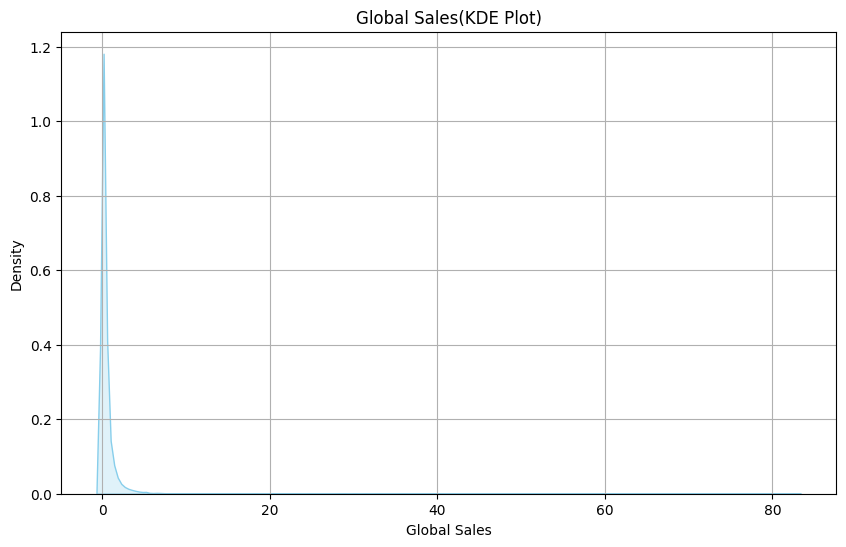

In [70]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Global_Sales', fill=True, color='skyblue')

plt.title('Global Sales(KDE Plot)')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#Description of this KDE plot

A smooth curve showing how video game sales are distributed globally.

The peak of the curve shows where most sales values lie (e.g., around 0.1–0.5 million units).

It's useful to identify concentration and spread in continuous data.

#Remove Outlier

In [71]:
q1=df['Global_Sales'].quantile(0.25) # first 25% vanda kam value nikaleko
q3=df['Global_Sales'].quantile(0.75) #75% vanda kam value nikaleko
iqr=q3-q1 #interquartile range middle part dekhauxa
df=df[(df['Global_Sales']>=q1-1.5*iqr) & (df['Global_Sales']<=q3+1.5*iqr)] # es line le Q1 - 1.5×IQR vanda kam ra Q3 + 1.5×IQR vanda badi bhayeko value harulai hatauxa.
# esko sabaivanda sano value ra sabai vanda thulo value lai remove garera normal range ko balance ma milayera accouracy result ramro dinxa.

#Feature Engineering

<ipython-input-72-26d2c5e34dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NA_to_Global'] = df['NA_Sales'] / df['Global_Sales']#yo line NA_to_Global naya naam ko column,jasma North America ko sales lai Global sales bata divide gareko hunxa


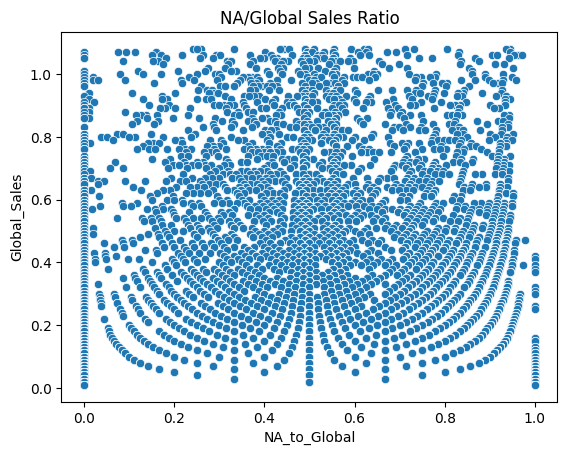

In [72]:

df['NA_to_Global'] = df['NA_Sales'] / df['Global_Sales']#yo line NA_to_Global naya naam ko column,jasma North America ko sales lai Global sales bata divide gareko hunxa
sns.scatterplot(x='NA_to_Global', y='Global_Sales', data=df) #NA_to_Global (x-axis) र Global_Sales (y-axis) bichko relation dekhauna scatter plot banainxa.
plt.title("NA/Global Sales Ratio"); plt.show() #Visualized the new feature

#Statistical Summaries

In [73]:
print("Statistical Summary:")
print(df['Global_Sales'].describe())

Statistical Summary:
count    14705.000000
mean         0.231474
std          0.242468
min          0.010000
25%          0.050000
50%          0.140000
75%          0.330000
max          1.080000
Name: Global_Sales, dtype: float64


#Summarize Findings

In [74]:
print("Top Genres by Global Sales:\n", df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head())
print("Top Platforms by Global Sales:\n", df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head())
print("Top Publishers by Global Sales:\n", df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head())


Top Genres by Global Sales:
 Genre
Action          723.67
Sports          571.51
Misc            344.46
Role-Playing    297.68
Shooter         284.83
Name: Global_Sales, dtype: float64
Top Platforms by Global Sales:
 Platform
PS2     489.27
DS      362.79
PS3     343.60
X360    325.76
Wii     306.72
Name: Global_Sales, dtype: float64
Top Publishers by Global Sales:
 Publisher
Electronic Arts                413.88
Activision                     250.07
Ubisoft                        221.46
THQ                            197.50
Sony Computer Entertainment    184.49
Name: Global_Sales, dtype: float64


Action Sports game haru sabai vanda badi sales bayeko xa

PlayStation 2, X360, ra PS3 sales badi dekhiyeko xa

NA, north america ma 50%.badi sales bhayeko dekhiyo 2005-2010 ko bichma.

Nintendo DS/Wii/PS2 le karanle

Outliers Wii Sports sab banda badi sales bhayeko sports